In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
genders = df['Gender'].value_counts()

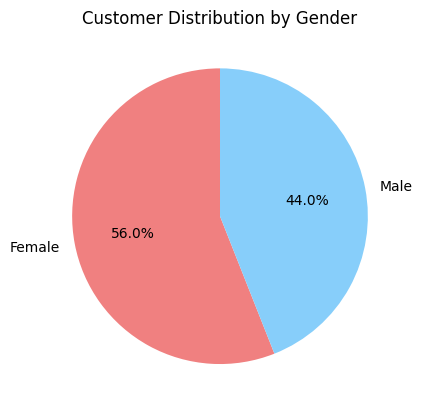

In [6]:
plt.pie(genders, labels=genders.index, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Gender')
plt.show()

In [7]:
df["Age"].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

In [8]:
def agebin(age):
    if age >= 15 and age <=20:
        return 1
    elif age >=21 and age <=30:
        return 2
    elif age >=31 and age <=40:
        return 3
    elif age >=41 and age <=50:
        return 4
    elif age >=51 and age <=60:
        return 5
    elif age >=61 and age <=70:
        return 6
    else:
        return 0

df['AgeBin'] = df['Age'].apply(agebin)
df['AgeBin'].value_counts()

AgeBin
3    60
2    45
4    38
5    23
1    17
6    17
Name: count, dtype: int64

[1, 2, 3, 4, 5, 6]


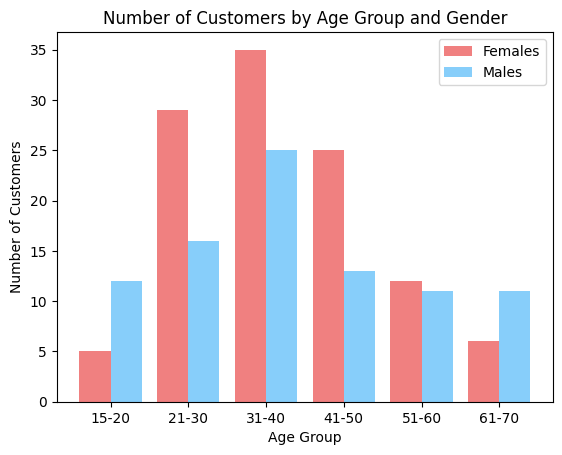

In [9]:
females = df[df['Gender'] == 'Female']
males = df[df['Gender'] == 'Male']
age_group_females = females['AgeBin'].value_counts().sort_index()
age_group_males = males['AgeBin'].value_counts().sort_index()

# get the all values unique of agebin
age_bins = sorted(df['AgeBin'].unique())  
print(age_bins)
bar_width = 0.40  
x = range(len(age_bins))
label = ['15-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# x is the total number of age groups and y is values for female customers
plt.bar(x, age_group_females, width=bar_width, label='Females', color='lightcoral')
# to plot the bar right beside i added the width to the x values 
plt.bar([i + bar_width for i in x], age_group_males, width=bar_width, label='Males', color='lightskyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group and Gender')
# to  display the lables in the center of each bars i diveded each values of x + width of the bar by 2 
plt.xticks([i + bar_width / 2 for i in x], label)  
plt.legend() 
plt.show()

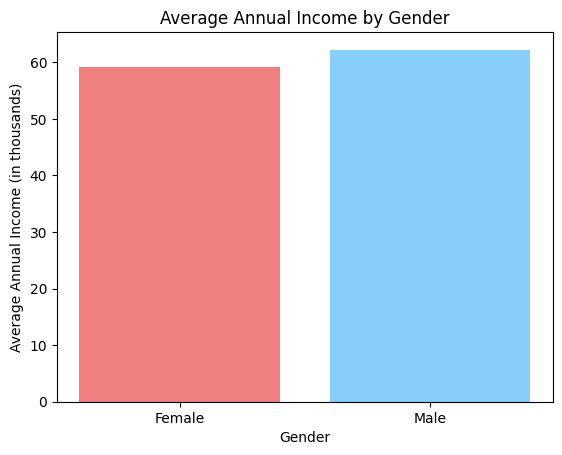

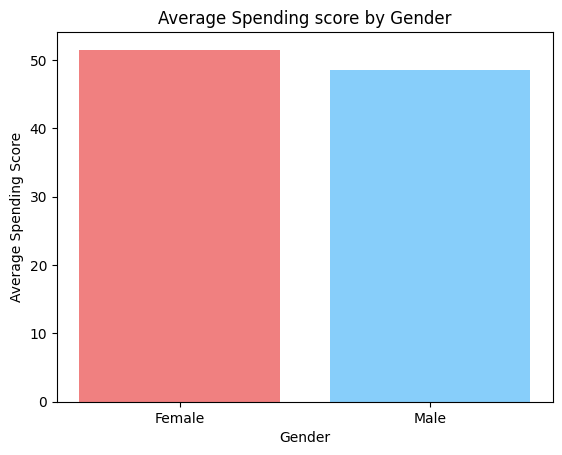

In [10]:
avg_income = df.groupby('Gender')['Annual Income (k$)'].mean()
avg_spending = df.groupby('Gender')['Spending Score (1-100)'].mean()

plt.bar(avg_income.index, avg_income, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Gender')
plt.ylabel('Average Annual Income (in thousands)')
plt.title('Average Annual Income by Gender')
plt.show()

plt.bar(avg_spending.index, avg_spending, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending score by Gender')
plt.show()

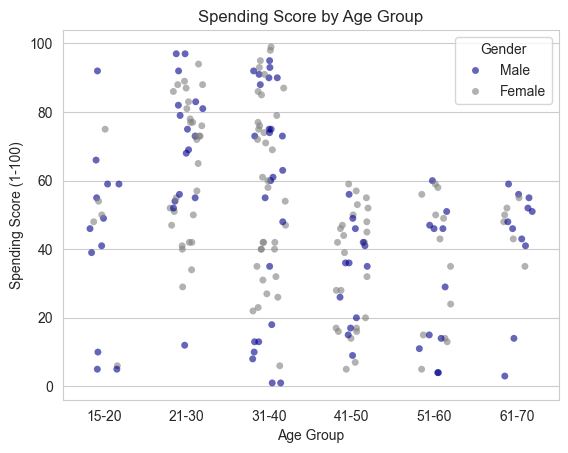

In [11]:
sns.set_style("whitegrid") # setting the background 
sns.set_palette(["darkblue", "grey"]) # colors

sns.stripplot(x='AgeBin', y='Spending Score (1-100)', hue='Gender', size=5, data=df, jitter=0.2, alpha=0.6)
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Age Group')
age_labels = ['15-20', '21-30', '31-40', '41-50', '51-60', '61-70']
plt.xticks(range(len(age_labels)), age_labels)
plt.show()

Gender     Female       Male
AgeBin                      
1       46.600000  43.833333
2       65.517241  70.312500
3       58.714286  55.800000
4       35.160000  32.923077
5       35.083333  29.727273
6       47.166667  42.545455


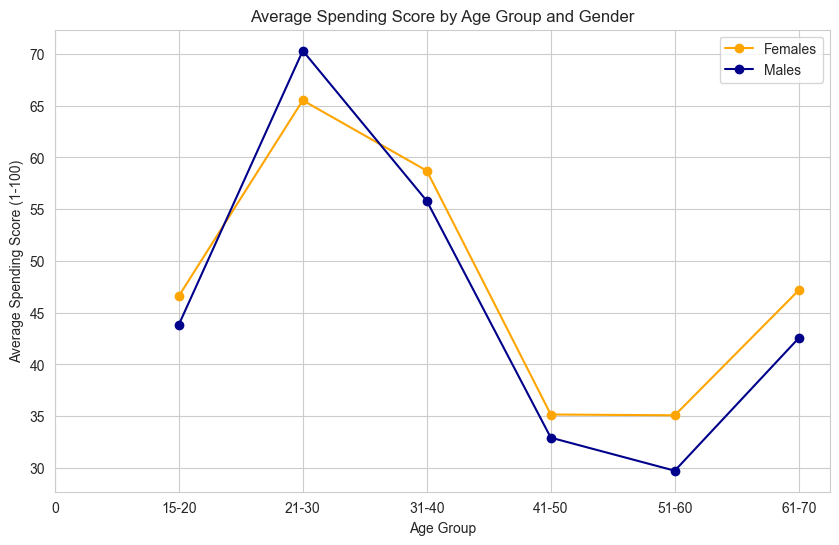

In [12]:
avg_spending = df.groupby(['AgeBin', 'Gender'])['Spending Score (1-100)'].mean().unstack()
print(avg_spending)
plt.figure(figsize=(10, 6))
plt.plot(avg_spending.index, avg_spending['Female'], marker='o', label='Females', color='orange')
plt.plot(avg_spending.index, avg_spending['Male'], marker='o', label='Males', color='darkblue')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score by Age Group and Gender')
age_labels = ['0','15-20', '21-30', '31-40', '41-50', '51-60', '61-70']
plt.xticks(range(len(age_labels)), age_labels)
plt.legend()
plt.show()